In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt

Plotear la funcion original

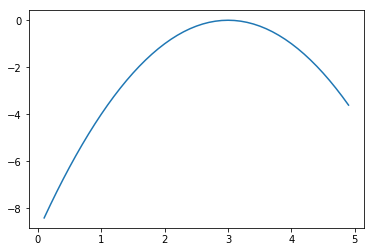

In [3]:
x=np.arange(0.1,5,.1)
x=x.reshape(-1,1)
y=-(x-3)**2
y=y.reshape(-1,1)
plt.plot(x,y)

Declarar la estrucura de la red Neuronal

In [4]:
layer1=100
n_samples=len(x)
batchsize=np.int32(np.floor(n_samples/5))

xp=tf.placeholder(tf.float32, [None, 1])
y_exp=tf.placeholder(tf.float32, [None, 1])
W1=tf.Variable(tf.random_normal([1,layer1]))
b1=tf.Variable(tf.zeros([layer1]))

W2=tf.Variable(tf.random_normal([layer1,1]))
b2=tf.Variable(tf.zeros([1]))

x2=tf.nn.sigmoid(tf.add(tf.matmul(xp,W1),b1))
#x2=tf.nn.relu(tf.add(tf.matmul(xp,W1),b1))
#x2=tf.nn.sigmoid(tf.add(tf.matmul(xp,W1),b1))
y_pred=tf.add(tf.matmul(x2,W2),b2)
mse=tf.reduce_sum((y_pred-y_exp+1)**2/batchsize)
#mse=(y_pred-y_exp)**2

Iniciar session de tensorflow y entrenar la red 6000 veces

In [5]:
sess=tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [6]:
train_step=tf.train.GradientDescentOptimizer(0.001).minimize(mse)
errorgraph=[]
for step in range(10000):
    if step%1000==0:
        print (step)
        indices = np.random.choice(n_samples, batchsize)
        print(sess.run(mse,feed_dict={xp:x,y_exp:y}))
    if step%100==0:
        errorgraph.append(sess.run(mse,feed_dict={xp:x,y_exp:y}))
    indices = np.random.choice(n_samples, 1)
    batch_xs, batch_ys =x[indices],y[indices]
    sess.run(train_step, feed_dict={xp:batch_xs,y_exp:batch_ys})
    


0
308.8942
1000
16.152458
2000
13.042265
3000
11.076692
4000
9.899247
5000
8.795317
6000
7.9062424
7000
7.09576
8000
6.4378815
9000
5.7357483


Comparar funcion original(naranja) contra aproximacion con NN(Azul)

C:\Users\Legion\Anaconda3\envs\Patt\lib\site-packages\matplotlib\figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


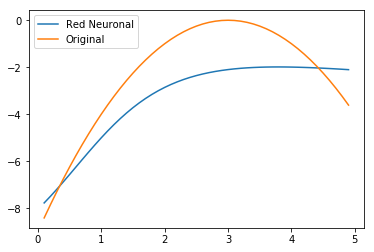

In [7]:
ind=x
inpu = ind.reshape(-1,1)
preded_y=sess.run(y_pred,{xp:inpu})
        
fig=plt.figure()
plt.plot(x,preded_y,label='Red Neuronal')
plt.plot(x,y,label='Original')
plt.legend()
fig.show()

Ploteo de error a lo largo del entrenamineto

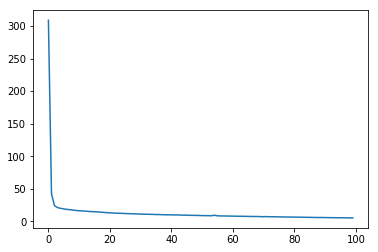

In [8]:
plt.plot(errorgraph)

In [9]:
sess.close()